In [41]:
import doodler_forall as dd
import numpy as np
import utils as u
from pathlib import Path
from datetime import datetime

import matplotlib.pyplot as plt

In [42]:
_doodle_image_types = dd._doodle_image_types_

In [43]:
def create_empty_subsets(path):
    train_set = path / 'train_set'
    test_set = path / 'test_set'
    val_set = path / 'val_set'

    train_set.mkdir()
    test_set.mkdir()
    val_set.mkdir()

In [44]:
def generate_dataset_folder_name(size, nb_classes, n):
    address = Path('datasets')
    name_folder = f"dataset_{str(datetime.now().date())}_{size}_{nb_classes}_{n}"

    path = address / name_folder
    if not path.exists():
        path.mkdir()
        # create_empty_subsets(path)
        return name_folder
    
    k = 1
    folder = name_folder + f"_v{k}"
    path = address / folder
    while path.exists():
        k += 1
        folder = name_folder + f"_v{k}"
        path = address / folder
    
    path.mkdir()

    # create_empty_subsets(path)
    
    return folder

In [45]:
def split_dataset(dataset, proportions = (70, 20, 10)):
    assert sum(proportions) == 100, "Proportions do not make 100%"

    train_size = int(proportions[0] * len(dataset[0]) / 100)
    test_size = int(proportions[1] * len(dataset[0]) / 100)

    inputs, targets, labels, _, _ = dataset
    # dataset = (inputs.astype(np.float32), targets, target_labels,(rows,cols),flat)
    X_train = inputs[:train_size]
    Y_train = targets[:train_size]
    labels_train = labels[:train_size]

    X_test = inputs[train_size:train_size + test_size]
    Y_test = targets[train_size:train_size + test_size]
    labels_test = labels[train_size:train_size + test_size]

    X_val = inputs[train_size + test_size:]
    Y_val = targets[train_size + test_size:]
    labels_val = labels[train_size + test_size:]
    
    return (X_train, Y_train, labels_train), (X_test, Y_test, labels_test), (X_val, Y_val, labels_val)

In [46]:
def save_data_in_folder(address, data_subset, X, Y, labels):
    
    np.save(address / f"X_{data_subset}.npy", X)
    np.save(address / f"Y_{data_subset}.npy", Y)
    np.save(address / f"labels_{data_subset}.npy", labels)

In [47]:
def create_dataset(proportions = (70, 20, 10), 
                   dataset_size = 100, image_size = 30, noise = .1, relative_sizes = [0.15,0.3], 
                #    size_range, 
                   flattening = False, centered = True, image_types = _doodle_image_types):
    dataset_name = generate_dataset_folder_name(dataset_size, len(image_types), image_size)
    
    dataset = dd.gen_doodle_cases(count=dataset_size,rows=image_size,cols=image_size,imt=image_types, hr=relative_sizes,wr=relative_sizes,
                    nbias=noise,cent=centered, show=False,
                    one_hots=True,auto=False, flat=flattening,bkg=0, d4=False, fog=1, fillfrac=None, fc=(1,1),
                    gap=1,multi=False,mono=True, dbias=0.7,poly=(4,5,6))
    
    (X_train, Y_train, labels_train), (X_test, Y_test, labels_test), (X_val, Y_val, labels_val) = split_dataset(dataset, proportions)

    save_data_in_folder(Path('datasets') / dataset_name, 'train', X_train, Y_train, labels_train)
    save_data_in_folder(Path('datasets') / dataset_name, 'test', X_test, Y_test, labels_test)
    save_data_in_folder(Path('datasets') / dataset_name, 'val', X_val, Y_val, labels_val)
    
    return dataset_name

In [48]:
def load_subsets(address, data_subset):

    X = np.load(address / f"X_{data_subset}.npy")
    Y = np.load(address / f"Y_{data_subset}.npy")
    labels = np.load(address / f"labels_{data_subset}.npy")

    return (X, Y, labels)

In [49]:
def load_dataset(dataset_folder):
    address = Path('datasets') / dataset_folder
    
    training_set = load_subsets(address, 'train')
    testing_set = load_subsets(address, 'test')
    val_set = load_subsets(address, 'val')

    return training_set, testing_set, val_set

In [50]:
dataset_name = u.create_dataset(dataset_size=1000)

In [51]:
training_set, testing_set, val_set = u.load_dataset(dataset_name)

In [58]:
def verify_distribution_in_dataset(dataset_name):
    training_set, testing_set, val_set = u.load_dataset(dataset_name)
    _, _, labels_train = training_set
    _, _, labels_test = testing_set
    _, _, labels_val = val_set

    plt.hist(labels_train, bins=20)
    plt.show()

    plt.hist(labels_test, bins=20)
    plt.show()

    plt.hist(labels_val, bins=20)
    plt.show()

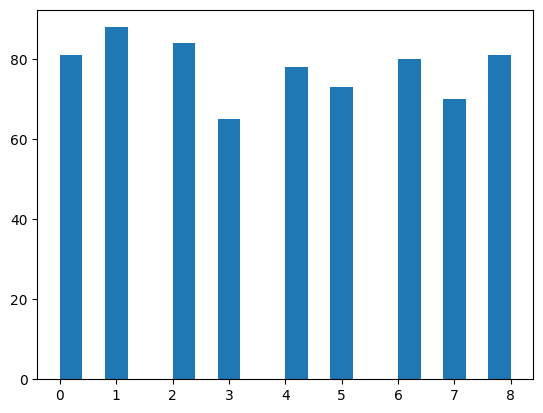

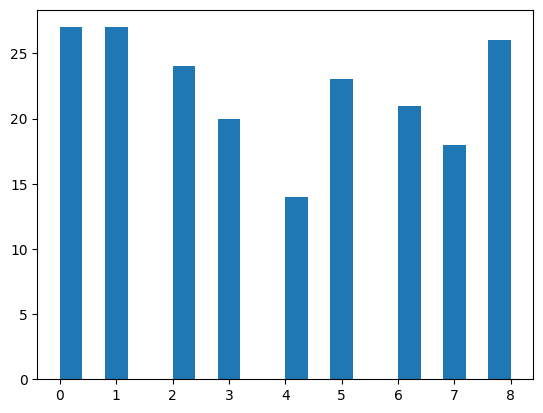

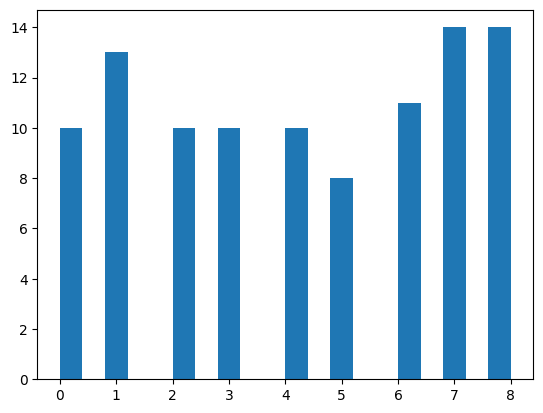

In [59]:
verify_distribution_in_dataset(dataset_name)

In [54]:
type(val_set[2])

numpy.ndarray

In [55]:
labels = np.concatenate((training_set[2], testing_set[2], val_set[2]))

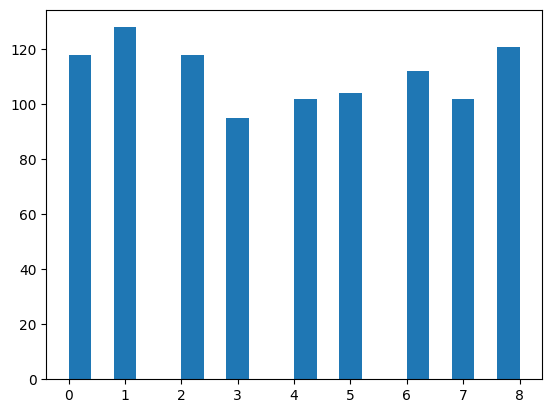

In [56]:
plt.hist(labels, bins=20)
plt.show()